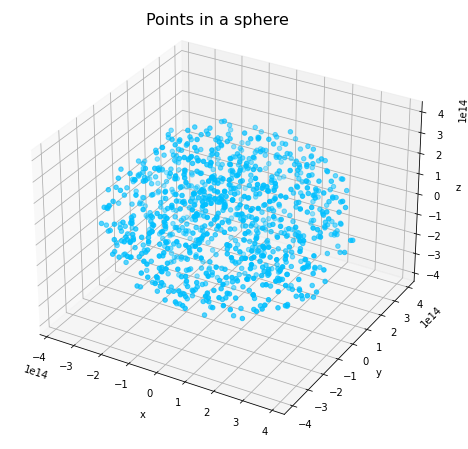

In [1]:
import numpy as np
import matplotlib.pyplot as plt

################################################################################################################

N = 1000 #number of points
a = 40*10**13  #radius of the sphere
t_in = 0
m = 10**31
v_x = np.zeros(N)
v_y = np.zeros(N)
v_z = np.zeros(N)
### FUNCTIONS ##################################################################################################

def r(P, a) :
    return (P * a**3)**(1/3)

def theta(P) :
    return np.arccos(1 - 2*P)

def phi(P) :
    return 2 * np.pi * P

################################################################################################################


# random generated P
# three different ones in order not to be correlated
Pr = np.random.uniform(0, 1, N)
Ptheta = np.random.uniform(0, 1, N)
Pphi = np.random.uniform(0, 1, N)

# polar coordinates
r = r(Pr, a)
theta = theta(Ptheta)
phi = phi(Pphi)

'''
theta=np.arccos(np.random.uniform(-1,1,N))   # Polar
phi = np.pi*np.random.uniform(-1,1,N)        # Azimuthal
psi = np.pi*np.random.uniform(-1,1,N)        # Azimuthal
#iota = np.arccos(np.random.uniform(-1,1,mcn))  # Polar 
'''

# cartesian coordinates
x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection = '3d')
fig.suptitle("Points in a sphere", fontsize='16', y=0.87)
ax.set_xlabel('\nx')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter(x, y, z, color = 'deepskyblue')
plt.show()

In [2]:
sphere = open("sphere.in", "w")

#sphere.write(str(N) + "\n"+ str(t_in) + "\n")

for i in range(N):
    sphere.write(str(m) + " "+ str(x[i])+ " " + str(y[i])+ " " + str(z[i])+ " " + str(v_x[i])+ " " + str(v_y[i])+ " " + str(v_z[i]))
    if (i != N):
        sphere.write("\n")
sphere.close()
#print(sphere.read())



# Let's do the conversion in internal units 

\begin{equation}
\frac{G_{physical} M_{physical}}{R_{physical} v^2_{physical}} = \frac{G_{internal} M_{internal}}{R_{internal} v^2_{internal}}
\end{equation}

but 
\begin{equation}
G_{internal} = 1
\end{equation}

so

\begin{equation}
G_{physical} = \frac{ \frac{R_{internal} }{ R_{physical}} \frac{ v^2_{physical} }{ v^2_{internal} }} { \frac{M_{physical} } {M_{internal}}}
\end{equation}



In [15]:
#we can choose the units we want to use....
# I can either fix: G (=1 always), M and r, OR : G(=1 always), M, v

G = 6.674e-11 #N⋅m2/kg2 or 6.674 * 10**(-8) in cgs
starting_time = 0       #starting time added to the input_converted file
center_of_mass = 0      #set this to True if you want the coordinates to be in the center of mass

#mass is always set (we can change it in the future but I think it's the simplest way)
#now we are left with radius and velocity

set_radius = True       #if this is True the radius will be set to 1 ua (which can be changed in the code). Then the velocity will be calculated accordingly (to get G=1)
#if this is False the velocity will be set to the velocity of earth and the radius will be calculated accordingly




mass = []
x = []
y = []
z = []
vx =[]
vy = []
vz = []
r = []

mass, x, y, z, vx, vy, vz = np.loadtxt("sphere.in", delimiter=" ", comments="#", dtype="float").T
number_of_bodies = len(mass)

mass_x = [a * b for a, b in zip(mass, x)]      #mass times coordinate x
mass_y = [a * b for a, b in zip(mass, y)]      #mass times coordinate y
mass_z = [a * b for a, b in zip(mass, z)]      #mass times coordinate z
mass_vx = [a * b for a, b in zip(mass, vx)]      #mass times coordinate vx
mass_vy = [a * b for a, b in zip(mass, vy)]      #mass times coordinate vy
mass_vz = [a * b for a, b in zip(mass, vz)]      #mass times coordinate vz

cm_x = np.sum(mass_x)/sum(mass)
cm_y = np.sum(mass_y)/sum(mass)
cm_z = np.sum(mass_z)/sum(mass)
cm_vx = np.sum(mass_vx)/sum(mass)
cm_vy = np.sum(mass_vy)/sum(mass)
cm_vz = np.sum(mass_vz)/sum(mass)

print(len(mass))

#mass_internal = mass[0]     #use the first mass as unit, you can choose another one
mass_internal = 1.98892 *10**33 # g 1 solar mass as internal unit

if set_radius == True:
    r_internal = 14959787070000   #cm, 1 ua, you can change this to be anything (but 0)
    v_internal = np.sqrt(G*mass_internal/r_internal)

else:
    v_internal =  2978480   #cm/s more or less the velocity of the earth around the sun... we can change it
    r_internal = G*mass_internal/v_internal**2

t_internal = r_internal/v_internal


new_mass = mass/mass_internal

if center_of_mass == True:
    new_x = (x-cm_x)/r_internal
    new_y = (y-cm_y)/r_internal
    new_z = (z-cm_z)/r_internal
    new_vx = (x-cm_vx)/v_internal
    new_vy = (x-cm_vy)/v_internal
    new_vz = (x-cm_vz)/v_internal
else:
    new_x = x/r_internal
    new_y = y/r_internal
    new_z = z/r_internal
    new_vx = vx/v_internal
    new_vy = vy/v_internal
    new_vz = vz/v_internal



with open("sphere_converted.in", "w") as f:     #file ready to be given to the C code
    print(number_of_bodies, starting_time, sep="\n", file=f)
    np.savetxt(f, np.column_stack([new_mass, new_x, new_y, new_z, new_vx, new_vy, new_vz]), delimiter=" ")

    


1000


# period, dynamical time, collapse time

In [22]:
rho_int = N* new_mass[0] / (4/3 * np.pi * (r_internal)**3 ) # mass / volume SHOULD THIS BE DONE IN INTERNAL UNITS???

period_1orbit= 2*np.pi*t_internal
dyn_time = np.sqrt(3* np.pi /(16 * G* rho_int))
collapse_time = dyn_time / np.sqrt(2)

print(period_1orbit, dyn_time, collapse_time)
# MAH NON SONO CONVINTA... COMUNQUE RHO DOVREBBE RIMANERE UGUALE, POSSO CALCOLARLA SENZA CONVERSIONE

rho = N * mass[0] / (4/3 * np.pi * (r)**3 )

997852219.8555834 4.961620592787917e+24 3.5083955668351537e+24


TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [16]:
sphere_converted = open("sphere_converted.in", "r")
mass_c, x_c, y_c, z_c, vx_c, vy_c, vz_c = np.loadtxt("sphere_converted.in", delimiter=" ", comments="#", dtype="float").T
print(len(mass_c))

#print(sphere_converted.read())


1000
